In [37]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [38]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [39]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")


Number of rows: 200
Number of Columns: 4


In [40]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Text(0.5, 1.0, 'Correlation among the Variables')

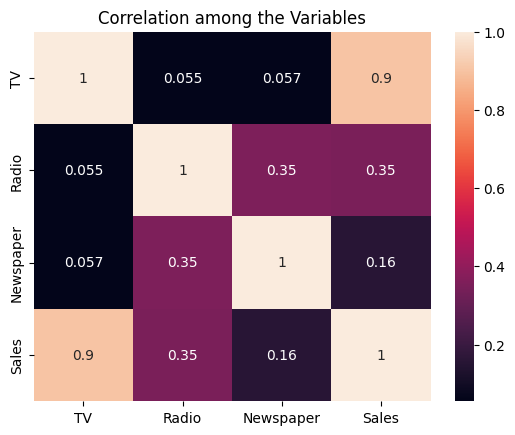

In [41]:
sns.heatmap(df.corr(), annot=True, fmt='.2g')
plt.title('Correlation among the Variables')


Text(0, 0.5, 'Values')

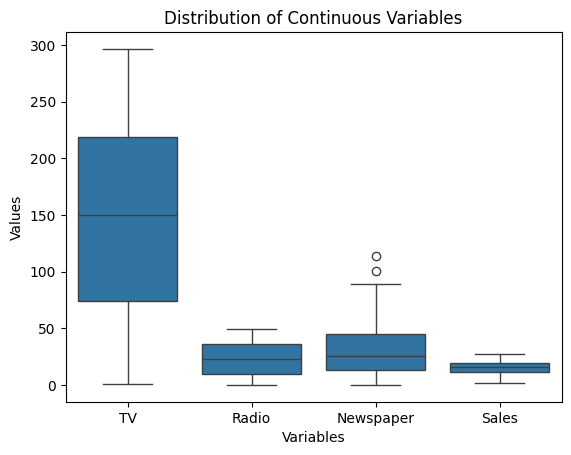

In [42]:
sns.boxplot(df.melt(value_vars=df.columns), x='variable', y='value')
plt.title('Distribution of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

Text(0, 0.5, 'Values')

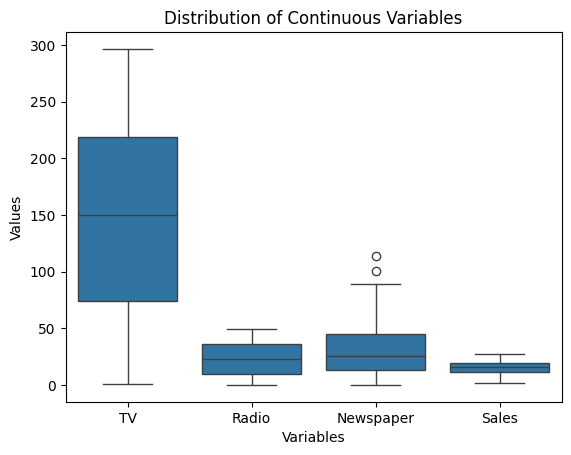

In [43]:
sns.boxplot(df.melt(value_vars=df.columns), x="variable", y="value")
plt.title('Distribution of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')



In [44]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(f'X Train: {X_train.shape}')
print(f'X Test: {X_test.shape}')
print(f'y Train: {y_train.shape}')
print(f'y Test: {y_test.shape}')


X Train: (160, 3)
X Test: (40, 3)
y Train: (160,)
y Test: (40,)


In [46]:
preprocess = Pipeline([
    ('scaler', StandardScaler())
])

# model
model = Pipeline([
    ('preprocess', preprocess),
    ('regressor', RandomForestRegressor())
])

model.fit(X_train, y_train)
y_pred=model.predict(X_test)



In [47]:
y_pred = model.predict(X_test)
print(f'Testing Accuracy: {round(100 * r2_score(y_test, y_pred), 2)}%')

Testing Accuracy: 94.24%


In [48]:
with open('./model.pkl', 'wb') as fp:
    pickle.dump(model,fp)

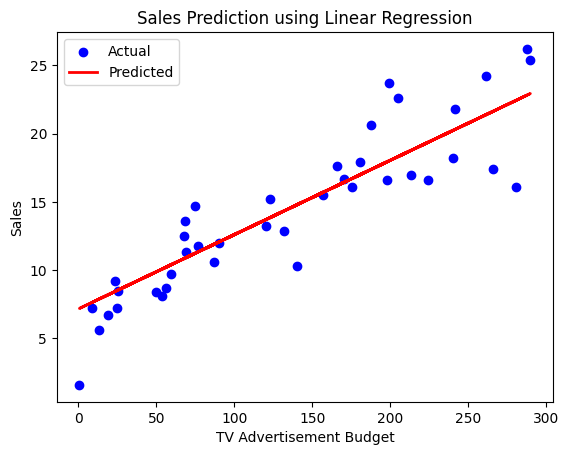

In [53]:
plt.scatter(X_test,y_test,color="blue",label="Actual")
plt.plot(X_test,y_pred,color="red",linewidth=2,label="Predicted")
plt.xlabel("TV Advertisement Budget")
plt.ylabel("Sales")
plt.title("Sales Prediction using Linear Regression")
plt.legend()
plt.show()